# The Visualization of the Progress of the Philippines' Sustainable Development Goals (SDGs)

## Requirements and Imports
Before starting, the relevant libraries and files in building and training the model should be loaded into the notebook first.

### Basic Libraries
Several libraries are required to perform a thorough analysis of the dataset. Each of these libraries will be imported and described below:
* `pandas` contains a large collection of mathematical functions
* `numpy` contains functions that are designed for data manipulation and data analysis
* `geopandas` contains functionalities that make operations easier on spatial database 
* `matplotlib.pyplot` contains functions to create interactive plots
* `shapely.geometry` contain functions that allow the modification and inspection of geometric objections.

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Datasets and Files

There are two files that we would need to import through the use of [`read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) for this project. First is the `combined_data.csv`, which holds the information on the progress of the Philippines on the Sustainable Development Goals. Note that this data includes the data per region and for the country (i.e., national data).

In [2]:
url = 'https://raw.githubusercontent.com/francheska-vicente/datapre-project/main_v2/data_output/combined_data.csv'
sdg_data = pd.read_csv (url)
sdg_data 

,Geolocation,Year,1.2.1 Poverty Proportion,1.4.1 Net Elem Enrolment Rate,1.4.1 Net Elem Enrolment Rate (Girls),1.4.1 Net Elem Enrolment Rate (Boys),1.4.1 Net JHS Enrolment Rate,1.4.1 Net JHS Enrolment Rate (Girls),1.4.1 Net JHS Enrolment Rate (Boys),1.4.1 Net SHS Enrolment Rate,...,Gross Capital Formation,GRDP,Population,Primary Drop-out rate,Primary Drop-out rate (Girls),Primary Drop-out rate (Boys),Secondary Drop-out rate,Secondary Drop-out rate (Girls),Secondary Drop-out rate (Boys),Price Index for Agriculture
0,PHILIPPINES,2000,NaN,96.77,97.28,96.27,66.06,69.49,62.72,NaN,...,579938180.0,3.697556e+09,76723051.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NCR: National Capital Region,2000,NaN,101.00,101.92,100.13,79.05,79.50,78.57,NaN,...,203930819.0,1.237451e+09,9961971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CAR: Cordillera Administrative Region,2000,NaN,94.42,94.58,94.26,71.19,76.37,66.14,NaN,...,13865180.0,9.044601e+07,1369249.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Region 1: Ilocos Region,2000,NaN,97.73,97.01,98.41,87.51,90.05,85.07,NaN,...,24454284.0,1.289450e+08,4209083.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Region 2: Cagayan Valley,2000,NaN,95.65,95.74,95.57,77.11,81.11,73.31,NaN,...,32773347.0,8.593798e+07,2819641.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,Region 10: Northern Mindanao,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,164566009.0,9.492320e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.975
392,Region 11: Davao Region,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,257595240.0,9.672276e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.850
393,Region 12: SOCCSKSARGEN,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,87077953.0,5.039756e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.350
394,CARAGA: CARAGA Administrative Region,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100730468.0,3.317629e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.525


Second is the file that holds the geospatial information of the regions of the Philippines.

In [3]:
regional_geo_data = gpd.read_file('./data/phl_adminboundaries_candidate_exclude_adm3/phl_admbnda_adm1_psa_namria_20200529.shp')
regional_geo_data

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,53.623497,1.050272,Bangsamoro Autonomous Region in Muslim Mindanao,PH150000000,NaN,BARMM,NaN,Philippines (the),PH,2016-06-30,2020-05-29,NaN,"MULTIPOLYGON (((119.46876 4.59360, 119.46881 4..."
1,8.027454,1.546712,Cordillera Administrative Region,PH140000000,NaN,CAR,NaN,Philippines (the),PH,2016-06-30,2020-05-29,NaN,"POLYGON ((121.22208 18.50058, 121.22086 18.483..."
2,2.320234,0.050216,National Capital Region,PH130000000,NaN,NCR,NaN,Philippines (the),PH,2016-06-30,2020-05-29,NaN,"POLYGON ((121.03842 14.78525, 121.03876 14.785..."
3,14.995101,1.043983,Region I,PH010000000,NaN,Ilocos Region,NaN,Philippines (the),PH,2016-06-30,2020-05-29,NaN,"MULTIPOLYGON (((119.86596 15.81539, 119.86597 ..."
4,19.139048,2.241812,Region II,PH020000000,NaN,Cagayan Valley,NaN,Philippines (the),PH,2016-06-30,2020-05-29,NaN,"MULTIPOLYGON (((122.46667 16.92135, 122.46674 ..."
5,15.949563,1.793513,Region III,PH030000000,NaN,Central Luzon,NaN,Philippines (the),PH,2016-06-30,2020-05-29,NaN,"MULTIPOLYGON (((120.11687 14.76309, 120.11689 ..."
6,27.624115,1.326710,Region IV-A,PH040000000,NaN,Calabarzon,NaN,Philippines (the),PH,2016-06-30,2020-05-29,NaN,"MULTIPOLYGON (((122.72165 13.36485, 122.72181 ..."
7,78.804542,2.220374,Region IV-B,PH170000000,NaN,Mimaropa,NaN,Philippines (the),PH,2016-06-30,2020-05-29,NaN,"MULTIPOLYGON (((117.31260 7.50671, 117.31249 7..."
8,23.181441,1.196677,Region IX,PH090000000,NaN,Zamboanga Peninsula,NaN,Philippines (the),PH,2016-06-30,2020-05-29,NaN,"MULTIPOLYGON (((121.88379 6.69138, 121.88380 6..."
9,44.923243,1.446324,Region V,PH050000000,NaN,Bicol Region,NaN,Philippines (the),PH,2016-06-30,2020-05-29,NaN,"MULTIPOLYGON (((122.98823 11.73079, 122.98824 ..."


## Data Cleaning and Pre-processing
Once we have imported the files that we would need, we would need to the clean and pre-process the dataset so that the two dataset could be combined.

Since we would be combining the two datasets based on the regions, let us first see values of the `ADM1_EN` column ni the geospatial data.

In [4]:
regional_geo_data ['ADM1_EN']

0     Bangsamoro Autonomous Region in Muslim Mindanao
1                    Cordillera Administrative Region
2                             National Capital Region
3                                            Region I
4                                           Region II
5                                          Region III
6                                         Region IV-A
7                                         Region IV-B
8                                           Region IX
9                                            Region V
10                                          Region VI
11                                         Region VII
12                                        Region VIII
13                                           Region X
14                                          Region XI
15                                         Region XII
16                                        Region XIII
Name: ADM1_EN, dtype: object

Next, we will also need to look at the values for the region column (i.e., `Geolocation`) in the data on the SDG.

In [5]:
sdg_data ['Geolocation'].unique ()

array(['PHILIPPINES', 'NCR: National Capital Region',
       'CAR: Cordillera Administrative Region', 'Region 1: Ilocos Region',
       'Region 2: Cagayan Valley', 'Region 3: Central Luzon',
       'Region 4A: CALABARZON', 'MIMAROPA: Southwestern Tagalog Region',
       'Region 5: Bicol Region', 'Region 6: Western Visayas',
       'Region 7: Central Visayas', 'Region 8: Eastern Visayas',
       'Region 9: Zamboanga Peninsula', 'Region 10: Northern Mindanao',
       'Region 11: Davao Region', 'Region 12: SOCCSKSARGEN',
       'CARAGA: CARAGA Administrative Region',
       'BARMM: Bangsamoro Autonomous Region in Muslim Mindanao'],
      dtype=object)

From these, we can see that they have different arrangement of the regions, and the region names are also formatted differently. Thus, we cannot directly merge the two DataFrames. 

### Separation of the National and Regional DataFrames

In the values of `Geolocation` for the SDG dataset, we can see that there is the value **PHILIPPINES**, which holds the national data for the SDGs. As this is not part of the geospatial dataset, we would be separating this from the regional data.

In [6]:
ph_sdg_data = sdg_data [sdg_data ['Geolocation'] == 'PHILIPPINES'].reset_index (drop = True)
ph_sdg_data

,Geolocation,Year,1.2.1 Poverty Proportion,1.4.1 Net Elem Enrolment Rate,1.4.1 Net Elem Enrolment Rate (Girls),1.4.1 Net Elem Enrolment Rate (Boys),1.4.1 Net JHS Enrolment Rate,1.4.1 Net JHS Enrolment Rate (Girls),1.4.1 Net JHS Enrolment Rate (Boys),1.4.1 Net SHS Enrolment Rate,...,Gross Capital Formation,GRDP,Population,Primary Drop-out rate,Primary Drop-out rate (Girls),Primary Drop-out rate (Boys),Secondary Drop-out rate,Secondary Drop-out rate (Girls),Secondary Drop-out rate (Boys),Price Index for Agriculture
0,PHILIPPINES,2000,NaN,96.7700,97.2800,96.2700,66.0600,69.4900,62.7200,NaN,...,5.799382e+08,3.697556e+09,76723051.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PHILIPPINES,2001,NaN,90.1000,90.9100,89.3300,57.5500,62.2400,52.9600,NaN,...,7.624295e+08,4.024399e+09,78273584.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PHILIPPINES,2002,NaN,90.2900,91.1000,89.5100,59.0000,63.7200,54.3900,NaN,...,8.900870e+08,4.350560e+09,79832103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PHILIPPINES,2003,NaN,88.7400,89.6800,87.8400,60.1500,65.0700,55.3400,NaN,...,9.213284e+08,4.717809e+09,81398610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PHILIPPINES,2004,NaN,87.1100,88.0800,86.1700,59.9700,65.0100,55.0400,NaN,...,1.103699e+09,5.323904e+09,82977428.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,PHILIPPINES,2005,NaN,84.4400,85.3500,83.5600,58.5400,63.5300,53.6500,NaN,...,1.098634e+09,5.917282e+09,84559930.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,PHILIPPINES,2006,NaN,83.2200,84.0800,82.3900,58.5900,63.4400,53.8500,NaN,...,1.049071e+09,6.550417e+09,86150420.0,6.37,5.00,7.64,8.5,6.7,10.4,NaN
7,PHILIPPINES,2007,NaN,84.9300,85.8300,84.0700,60.2100,64.8700,55.6500,NaN,...,1.160980e+09,7.198245e+09,87748896.0,5.99,4.72,7.17,7.5,5.6,9.3,NaN
8,PHILIPPINES,2008,NaN,85.1100,85.7000,84.5500,60.7400,65.1800,56.3900,NaN,...,1.526893e+09,8.050201e+09,89359772.0,6.02,4.87,7.07,7.4,5.8,9.1,NaN
9,PHILIPPINES,2009,NaN,89.4800,90.7700,88.2600,59.8900,64.8200,55.1600,NaN,...,1.462595e+09,8.390421e+09,90974244.0,6.28,4.93,7.52,8.0,6.2,9.7,NaN


Now, we can get the SDG data for the regions of the Philippines.

In [7]:
regional_sdg_data = sdg_data [sdg_data ['Geolocation'] != 'PHILIPPINES'].reset_index (drop = True)
regional_sdg_data

,Geolocation,Year,1.2.1 Poverty Proportion,1.4.1 Net Elem Enrolment Rate,1.4.1 Net Elem Enrolment Rate (Girls),1.4.1 Net Elem Enrolment Rate (Boys),1.4.1 Net JHS Enrolment Rate,1.4.1 Net JHS Enrolment Rate (Girls),1.4.1 Net JHS Enrolment Rate (Boys),1.4.1 Net SHS Enrolment Rate,...,Gross Capital Formation,GRDP,Population,Primary Drop-out rate,Primary Drop-out rate (Girls),Primary Drop-out rate (Boys),Secondary Drop-out rate,Secondary Drop-out rate (Girls),Secondary Drop-out rate (Boys),Price Index for Agriculture
0,NCR: National Capital Region,2000,NaN,101.00,101.92,100.13,79.05,79.50,78.57,NaN,...,203930819.0,1.237451e+09,9961971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CAR: Cordillera Administrative Region,2000,NaN,94.42,94.58,94.26,71.19,76.37,66.14,NaN,...,13865180.0,9.044601e+07,1369249.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Region 1: Ilocos Region,2000,NaN,97.73,97.01,98.41,87.51,90.05,85.07,NaN,...,24454284.0,1.289450e+08,4209083.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Region 2: Cagayan Valley,2000,NaN,95.65,95.74,95.57,77.11,81.11,73.31,NaN,...,32773347.0,8.593798e+07,2819641.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Region 3: Central Luzon,2000,NaN,98.32,97.85,98.77,74.32,76.58,72.13,NaN,...,8037710.0,3.687868e+08,8233671.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Region 10: Northern Mindanao,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,164566009.0,9.492320e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.975
370,Region 11: Davao Region,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,257595240.0,9.672276e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.850
371,Region 12: SOCCSKSARGEN,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,87077953.0,5.039756e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.350
372,CARAGA: CARAGA Administrative Region,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100730468.0,3.317629e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.525


To check if the national data for the SDGs were separated, let us check the unique values for the `Geolocation` column.

In [8]:
regional_sdg_data ['Geolocation'].unique ()

array(['NCR: National Capital Region',
       'CAR: Cordillera Administrative Region', 'Region 1: Ilocos Region',
       'Region 2: Cagayan Valley', 'Region 3: Central Luzon',
       'Region 4A: CALABARZON', 'MIMAROPA: Southwestern Tagalog Region',
       'Region 5: Bicol Region', 'Region 6: Western Visayas',
       'Region 7: Central Visayas', 'Region 8: Eastern Visayas',
       'Region 9: Zamboanga Peninsula', 'Region 10: Northern Mindanao',
       'Region 11: Davao Region', 'Region 12: SOCCSKSARGEN',
       'CARAGA: CARAGA Administrative Region',
       'BARMM: Bangsamoro Autonomous Region in Muslim Mindanao'],
      dtype=object)

From this, we are now sure that we only have the regional data.

### Fixing the Regional DataFrame for the GeoSpatial Data

Now that we have separated the regional and national data, we can now focus on the merging of the datasets. From the previous explorations, we know that the regions are named and arranged differently. 

To easily merge the datasets, let us rearrange the regions on the geospatial dataset to have the same arrangement as the regions on the regional SDG dataset.

In [10]:
regional_geo_data = pd.DataFrame (regional_geo_data.loc [2 : 2]).append (
    regional_geo_data.loc [1]
).append (
    regional_geo_data.loc [3 : 7]
).append (
    regional_geo_data.loc [9 : 12]
).append (
    regional_geo_data.loc [8]
).append(
    regional_geo_data.loc [13 : ]
).append(
    regional_geo_data.loc [0]
).reset_index (drop = True)

regional_geo_data

C:\Users\admin\AppData\Local\Temp\ipykernel_8560\3488050636.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regional_geo_data = pd.DataFrame (regional_geo_data.loc [2 : 2]).append (
C:\Users\admin\AppData\Local\Temp\ipykernel_8560\3488050636.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regional_geo_data = pd.DataFrame (regional_geo_data.loc [2 : 2]).append (
C:\Users\admin\AppData\Local\Temp\ipykernel_8560\3488050636.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regional_geo_data = pd.DataFrame (regional_geo_data.loc [2 : 2]).append (
C:\Users\admin\AppData\Local\Temp\ipykernel_8560\3488050636.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,2.320234,0.050216,National Capital Region,PH130000000,NaN,NCR,NaN,Philippines (the),PH,2016-06-30,2020-05-29,NaN,POLYGON ((121.03841659800003 14.78524708100002...
1,8.027454,1.546712,Cordillera Administrative Region,PH140000000,NaN,CAR,NaN,Philippines (the),PH,2016-06-30,2020-05-29,NaN,POLYGON ((121.22208115400008 18.50058094200005...
2,14.995101,1.043983,Region I,PH010000000,NaN,Ilocos Region,NaN,Philippines (the),PH,2016-06-30,2020-05-29,NaN,MULTIPOLYGON (((119.8659631480001 15.815394096...
3,19.139048,2.241812,Region II,PH020000000,NaN,Cagayan Valley,NaN,Philippines (the),PH,2016-06-30,2020-05-29,NaN,MULTIPOLYGON (((122.46666630600009 16.92134842...
4,15.949563,1.793513,Region III,PH030000000,NaN,Central Luzon,NaN,Philippines (the),PH,2016-06-30,2020-05-29,NaN,MULTIPOLYGON (((120.11686801200005 14.76308966...
5,27.624115,1.326710,Region IV-A,PH040000000,NaN,Calabarzon,NaN,Philippines (the),PH,2016-06-30,2020-05-29,NaN,MULTIPOLYGON (((122.7216452990001 13.364847839...
6,78.804542,2.220374,Region IV-B,PH170000000,NaN,Mimaropa,NaN,Philippines (the),PH,2016-06-30,2020-05-29,NaN,MULTIPOLYGON (((117.31259603500007 7.506706648...
7,44.923243,1.446324,Region V,PH050000000,NaN,Bicol Region,NaN,Philippines (the),PH,2016-06-30,2020-05-29,NaN,MULTIPOLYGON (((122.9882253830001 11.730793677...
8,27.589382,1.657135,Region VI,PH060000000,NaN,Western Visayas,NaN,Philippines (the),PH,2016-06-30,2020-05-29,NaN,MULTIPOLYGON (((122.4968432280001 9.5560704530...
9,29.113105,1.178431,Region VII,PH070000000,NaN,Central Visayas,NaN,Philippines (the),PH,2016-06-30,2020-05-29,NaN,MULTIPOLYGON (((123.27038790600011 9.084596680...


With this, the geospatial dataset's regions has the same arrangement as the regional SDG data. 

Although, before combining the datasets, we will need to drop the columns that are all **NaN** values first using the [`dropna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) function.

In [11]:
regional_geo_data = regional_geo_data.dropna (axis = 1)
regional_geo_data

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1ALT1EN,ADM0_EN,ADM0_PCODE,date,validOn,geometry
0,2.320234,0.050216,National Capital Region,PH130000000,NCR,Philippines (the),PH,2016-06-30,2020-05-29,POLYGON ((121.03841659800003 14.78524708100002...
1,8.027454,1.546712,Cordillera Administrative Region,PH140000000,CAR,Philippines (the),PH,2016-06-30,2020-05-29,POLYGON ((121.22208115400008 18.50058094200005...
2,14.995101,1.043983,Region I,PH010000000,Ilocos Region,Philippines (the),PH,2016-06-30,2020-05-29,MULTIPOLYGON (((119.8659631480001 15.815394096...
3,19.139048,2.241812,Region II,PH020000000,Cagayan Valley,Philippines (the),PH,2016-06-30,2020-05-29,MULTIPOLYGON (((122.46666630600009 16.92134842...
4,15.949563,1.793513,Region III,PH030000000,Central Luzon,Philippines (the),PH,2016-06-30,2020-05-29,MULTIPOLYGON (((120.11686801200005 14.76308966...
5,27.624115,1.326710,Region IV-A,PH040000000,Calabarzon,Philippines (the),PH,2016-06-30,2020-05-29,MULTIPOLYGON (((122.7216452990001 13.364847839...
6,78.804542,2.220374,Region IV-B,PH170000000,Mimaropa,Philippines (the),PH,2016-06-30,2020-05-29,MULTIPOLYGON (((117.31259603500007 7.506706648...
7,44.923243,1.446324,Region V,PH050000000,Bicol Region,Philippines (the),PH,2016-06-30,2020-05-29,MULTIPOLYGON (((122.9882253830001 11.730793677...
8,27.589382,1.657135,Region VI,PH060000000,Western Visayas,Philippines (the),PH,2016-06-30,2020-05-29,MULTIPOLYGON (((122.4968432280001 9.5560704530...
9,29.113105,1.178431,Region VII,PH070000000,Central Visayas,Philippines (the),PH,2016-06-30,2020-05-29,MULTIPOLYGON (((123.27038790600011 9.084596680...


In addition, since the `ADM0_EN`, `ADM0_PCODE`, `date`, and `validOn` columns only has the same value, we would be removing this from the dataset.

In [12]:
regional_geo_data = regional_geo_data [['Shape_Leng', 'Shape_Area', 'ADM1_EN', 'ADM1_PCODE', 'ADM1ALT1EN', 'geometry']]
regional_geo_data

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1ALT1EN,geometry
0,2.320234,0.050216,National Capital Region,PH130000000,NCR,POLYGON ((121.03841659800003 14.78524708100002...
1,8.027454,1.546712,Cordillera Administrative Region,PH140000000,CAR,POLYGON ((121.22208115400008 18.50058094200005...
2,14.995101,1.043983,Region I,PH010000000,Ilocos Region,MULTIPOLYGON (((119.8659631480001 15.815394096...
3,19.139048,2.241812,Region II,PH020000000,Cagayan Valley,MULTIPOLYGON (((122.46666630600009 16.92134842...
4,15.949563,1.793513,Region III,PH030000000,Central Luzon,MULTIPOLYGON (((120.11686801200005 14.76308966...
5,27.624115,1.326710,Region IV-A,PH040000000,Calabarzon,MULTIPOLYGON (((122.7216452990001 13.364847839...
6,78.804542,2.220374,Region IV-B,PH170000000,Mimaropa,MULTIPOLYGON (((117.31259603500007 7.506706648...
7,44.923243,1.446324,Region V,PH050000000,Bicol Region,MULTIPOLYGON (((122.9882253830001 11.730793677...
8,27.589382,1.657135,Region VI,PH060000000,Western Visayas,MULTIPOLYGON (((122.4968432280001 9.5560704530...
9,29.113105,1.178431,Region VII,PH070000000,Central Visayas,MULTIPOLYGON (((123.27038790600011 9.084596680...


Last, since we know that the regional SDG dataset is arranged per year then per regions (i.e., data for the same year are found one after the other) and that this dataset includes data from 2000 to 2022, we would need to repeat the geospatial dataset **22 times**.

In [13]:
final_regional_geo_data = pd.DataFrame ()

for i in range (22):
    final_regional_geo_data = final_regional_geo_data.append (regional_geo_data)
    
final_regional_geo_data = final_regional_geo_data.reset_index (drop = True)
final_regional_geo_data

C:\Users\admin\AppData\Local\Temp\ipykernel_8560\4192407329.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_regional_geo_data = final_regional_geo_data.append (regional_geo_data)
C:\Users\admin\AppData\Local\Temp\ipykernel_8560\4192407329.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_regional_geo_data = final_regional_geo_data.append (regional_geo_data)
C:\Users\admin\AppData\Local\Temp\ipykernel_8560\4192407329.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_regional_geo_data = final_regional_geo_data.append (regional_geo_data)
C:\Users\admin\AppData\Local\Temp\ipykernel_8560\4192407329.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1ALT1EN,geometry
0,2.320234,0.050216,National Capital Region,PH130000000,NCR,POLYGON ((121.03841659800003 14.78524708100002...
1,8.027454,1.546712,Cordillera Administrative Region,PH140000000,CAR,POLYGON ((121.22208115400008 18.50058094200005...
2,14.995101,1.043983,Region I,PH010000000,Ilocos Region,MULTIPOLYGON (((119.8659631480001 15.815394096...
3,19.139048,2.241812,Region II,PH020000000,Cagayan Valley,MULTIPOLYGON (((122.46666630600009 16.92134842...
4,15.949563,1.793513,Region III,PH030000000,Central Luzon,MULTIPOLYGON (((120.11686801200005 14.76308966...
...,...,...,...,...,...,...
369,15.002953,1.435115,Region X,PH100000000,Northern Mindanao,MULTIPOLYGON (((123.57503388200007 8.633431735...
370,17.934222,1.539971,Region XI,PH110000000,Davao Region,MULTIPOLYGON (((125.39719472100012 5.437910860...
371,13.229749,1.471068,Region XII,PH120000000,Soccsksargen,MULTIPOLYGON (((124.241580956 7.26285967200004...
372,28.166754,1.540820,Region XIII,PH160000000,Caraga,MULTIPOLYGON (((126.34198239000011 8.877101650...


Now, we can combine the two datasets using the [`concat`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) function.

In [14]:
combined_df = pd.concat ([regional_sdg_data, final_regional_geo_data], axis = 1)
combined_df

,Geolocation,Year,1.2.1 Poverty Proportion,1.4.1 Net Elem Enrolment Rate,1.4.1 Net Elem Enrolment Rate (Girls),1.4.1 Net Elem Enrolment Rate (Boys),1.4.1 Net JHS Enrolment Rate,1.4.1 Net JHS Enrolment Rate (Girls),1.4.1 Net JHS Enrolment Rate (Boys),1.4.1 Net SHS Enrolment Rate,...,Secondary Drop-out rate,Secondary Drop-out rate (Girls),Secondary Drop-out rate (Boys),Price Index for Agriculture,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1ALT1EN,geometry
0,NCR: National Capital Region,2000,NaN,101.00,101.92,100.13,79.05,79.50,78.57,NaN,...,NaN,NaN,NaN,NaN,2.320234,0.050216,National Capital Region,PH130000000,NCR,POLYGON ((121.03841659800003 14.78524708100002...
1,CAR: Cordillera Administrative Region,2000,NaN,94.42,94.58,94.26,71.19,76.37,66.14,NaN,...,NaN,NaN,NaN,NaN,8.027454,1.546712,Cordillera Administrative Region,PH140000000,CAR,POLYGON ((121.22208115400008 18.50058094200005...
2,Region 1: Ilocos Region,2000,NaN,97.73,97.01,98.41,87.51,90.05,85.07,NaN,...,NaN,NaN,NaN,NaN,14.995101,1.043983,Region I,PH010000000,Ilocos Region,MULTIPOLYGON (((119.8659631480001 15.815394096...
3,Region 2: Cagayan Valley,2000,NaN,95.65,95.74,95.57,77.11,81.11,73.31,NaN,...,NaN,NaN,NaN,NaN,19.139048,2.241812,Region II,PH020000000,Cagayan Valley,MULTIPOLYGON (((122.46666630600009 16.92134842...
4,Region 3: Central Luzon,2000,NaN,98.32,97.85,98.77,74.32,76.58,72.13,NaN,...,NaN,NaN,NaN,NaN,15.949563,1.793513,Region III,PH030000000,Central Luzon,MULTIPOLYGON (((120.11686801200005 14.76308966...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Region 10: Northern Mindanao,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,107.975,15.002953,1.435115,Region X,PH100000000,Northern Mindanao,MULTIPOLYGON (((123.57503388200007 8.633431735...
370,Region 11: Davao Region,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,110.850,17.934222,1.539971,Region XI,PH110000000,Davao Region,MULTIPOLYGON (((125.39719472100012 5.437910860...
371,Region 12: SOCCSKSARGEN,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,103.350,13.229749,1.471068,Region XII,PH120000000,Soccsksargen,MULTIPOLYGON (((124.241580956 7.26285967200004...
372,CARAGA: CARAGA Administrative Region,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,104.525,28.166754,1.540820,Region XIII,PH160000000,Caraga,MULTIPOLYGON (((126.34198239000011 8.877101650...


To ensure that we combined the datasets correctly based on the region, we will be looking at the `Geolocation` and the `ADM1ALT1EN` columns, which are the columns from the two datasets that holds the region names.

In [15]:
combined_df [['Geolocation', 'ADM1ALT1EN']].head(20)

,Geolocation,ADM1ALT1EN
0,NCR: National Capital Region,NCR
1,CAR: Cordillera Administrative Region,CAR
2,Region 1: Ilocos Region,Ilocos Region
3,Region 2: Cagayan Valley,Cagayan Valley
4,Region 3: Central Luzon,Central Luzon
5,Region 4A: CALABARZON,Calabarzon
6,MIMAROPA: Southwestern Tagalog Region,Mimaropa
7,Region 5: Bicol Region,Bicol Region
8,Region 6: Western Visayas,Western Visayas
9,Region 7: Central Visayas,Central Visayas


We can see that the region names for the two columns refer to the same region. Since these two columns holds the same data, we can remove the `ADM1ALT1EN` column, and the other columns that holds data regarding the region name (i.e., `ADM1_EN`, `ADM1_PCODE`).

In [18]:
final_columns = combined_df.columns [: 55].append (combined_df.columns [58: ])
final_columns

Index(['Geolocation', 'Year', '1.2.1 Poverty Proportion',
       '1.4.1 Net Elem Enrolment Rate',
       '1.4.1 Net Elem Enrolment Rate (Girls)',
       '1.4.1 Net Elem Enrolment Rate (Boys)', '1.4.1 Net JHS Enrolment Rate',
       '1.4.1 Net JHS Enrolment Rate (Girls)',
       '1.4.1 Net JHS Enrolment Rate (Boys)', '1.4.1 Net SHS Enrolment Rate',
       '1.4.1 Net SHS Enrolment Rate (Girls)',
       '1.4.1 Net SHS Enrolment Rate (Boys)',
       '1.5.4 Proportion of LGU with DRR',
       '3.4.1 Mortality rate credited to NCD',
       '3.4.1 Mortality rate credited to Cardio',
       '3.4.1 Mortality rate credited to Cancer',
       '3.4.1 Mortality rate credited to Diabetes',
       '3.4.1 Mortality rate credited to Respi',
       '3.7.1 Proportion of Contraceptive Use of Women',
       '3.7.2 Teenage pregnancy rates per 1000', '4.1 Elem Completion Rate',
       '4.1 Elem Completion Rate (Female)', '4.1 Elem Completion Rate (Male)',
       '4.1 JHS Completion Rate', '4.1 JHS Completion

Now, we will only get these columns in the combined DataFrame.

In [19]:
combined_df = combined_df[final_columns]
combined_df

,Geolocation,Year,1.2.1 Poverty Proportion,1.4.1 Net Elem Enrolment Rate,1.4.1 Net Elem Enrolment Rate (Girls),1.4.1 Net Elem Enrolment Rate (Boys),1.4.1 Net JHS Enrolment Rate,1.4.1 Net JHS Enrolment Rate (Girls),1.4.1 Net JHS Enrolment Rate (Boys),1.4.1 Net SHS Enrolment Rate,...,Primary Drop-out rate,Primary Drop-out rate (Girls),Primary Drop-out rate (Boys),Secondary Drop-out rate,Secondary Drop-out rate (Girls),Secondary Drop-out rate (Boys),Price Index for Agriculture,Shape_Leng,Shape_Area,geometry
0,NCR: National Capital Region,2000,NaN,101.00,101.92,100.13,79.05,79.50,78.57,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.320234,0.050216,POLYGON ((121.03841659800003 14.78524708100002...
1,CAR: Cordillera Administrative Region,2000,NaN,94.42,94.58,94.26,71.19,76.37,66.14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.027454,1.546712,POLYGON ((121.22208115400008 18.50058094200005...
2,Region 1: Ilocos Region,2000,NaN,97.73,97.01,98.41,87.51,90.05,85.07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.995101,1.043983,MULTIPOLYGON (((119.8659631480001 15.815394096...
3,Region 2: Cagayan Valley,2000,NaN,95.65,95.74,95.57,77.11,81.11,73.31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.139048,2.241812,MULTIPOLYGON (((122.46666630600009 16.92134842...
4,Region 3: Central Luzon,2000,NaN,98.32,97.85,98.77,74.32,76.58,72.13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.949563,1.793513,MULTIPOLYGON (((120.11686801200005 14.76308966...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Region 10: Northern Mindanao,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,107.975,15.002953,1.435115,MULTIPOLYGON (((123.57503388200007 8.633431735...
370,Region 11: Davao Region,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,110.850,17.934222,1.539971,MULTIPOLYGON (((125.39719472100012 5.437910860...
371,Region 12: SOCCSKSARGEN,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,103.350,13.229749,1.471068,MULTIPOLYGON (((124.241580956 7.26285967200004...
372,CARAGA: CARAGA Administrative Region,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,104.525,28.166754,1.540820,MULTIPOLYGON (((126.34198239000011 8.877101650...


### Converting the Pandas DataFrame to GeoPandas DataFrame

Lastly, we would be making a `GeoDataFrame` using the Pandas DataFrame that we have created.

In [28]:
gdf = gpd.GeoDataFrame(combined_df, geometry = combined_df ['geometry'])

gdf

,Geolocation,Year,1.2.1 Poverty Proportion,1.4.1 Net Elem Enrolment Rate,1.4.1 Net Elem Enrolment Rate (Girls),1.4.1 Net Elem Enrolment Rate (Boys),1.4.1 Net JHS Enrolment Rate,1.4.1 Net JHS Enrolment Rate (Girls),1.4.1 Net JHS Enrolment Rate (Boys),1.4.1 Net SHS Enrolment Rate,...,Primary Drop-out rate,Primary Drop-out rate (Girls),Primary Drop-out rate (Boys),Secondary Drop-out rate,Secondary Drop-out rate (Girls),Secondary Drop-out rate (Boys),Price Index for Agriculture,Shape_Leng,Shape_Area,geometry
0,NCR: National Capital Region,2000,NaN,101.00,101.92,100.13,79.05,79.50,78.57,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.320234,0.050216,"POLYGON ((121.03842 14.78525, 121.03876 14.785..."
1,CAR: Cordillera Administrative Region,2000,NaN,94.42,94.58,94.26,71.19,76.37,66.14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.027454,1.546712,"POLYGON ((121.22208 18.50058, 121.22086 18.483..."
2,Region 1: Ilocos Region,2000,NaN,97.73,97.01,98.41,87.51,90.05,85.07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.995101,1.043983,"MULTIPOLYGON (((119.86596 15.81539, 119.86597 ..."
3,Region 2: Cagayan Valley,2000,NaN,95.65,95.74,95.57,77.11,81.11,73.31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.139048,2.241812,"MULTIPOLYGON (((122.46667 16.92135, 122.46674 ..."
4,Region 3: Central Luzon,2000,NaN,98.32,97.85,98.77,74.32,76.58,72.13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.949563,1.793513,"MULTIPOLYGON (((120.11687 14.76309, 120.11689 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Region 10: Northern Mindanao,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,107.975,15.002953,1.435115,"MULTIPOLYGON (((123.57503 8.63343, 123.57462 8..."
370,Region 11: Davao Region,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,110.850,17.934222,1.539971,"MULTIPOLYGON (((125.39719 5.43791, 125.39719 5..."
371,Region 12: SOCCSKSARGEN,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,103.350,13.229749,1.471068,"MULTIPOLYGON (((124.24158 7.26286, 124.24233 7..."
372,CARAGA: CARAGA Administrative Region,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,104.525,28.166754,1.540820,"MULTIPOLYGON (((126.34198 8.87710, 126.34167 8..."


## Exploratory Data Analysis

To explore that the combined dataset can be used for visualizations, exploratory data analysis was done. 

### Which regions that have the highest number of murder cases from the most recent data?

First, since we will be exploring the number of murder cases in the Philippines, we will only get four columns: 
1. The `Geolocation` column determines the region name
2. The `Year` column provides the information on the most recent data 
3. The `16.1.s1 Number of murder cases` holds the information about the number of the murder cases per region
4. The `geometry` will be used for the geospatial visualization.

In [71]:
combined_df[['Geolocation', 'Year', '16.1.s1 Number of murder cases', 'geometry']].dropna ()

,Geolocation,Year,16.1.s1 Number of murder cases,geometry
272,NCR: National Capital Region,2016,2318.0,POLYGON ((121.03841659800003 14.78524708100002...
273,CAR: Cordillera Administrative Region,2016,180.0,POLYGON ((121.22208115400008 18.50058094200005...
274,Region 1: Ilocos Region,2016,560.0,MULTIPOLYGON (((119.8659631480001 15.815394096...
275,Region 2: Cagayan Valley,2016,321.0,MULTIPOLYGON (((122.46666630600009 16.92134842...
276,Region 3: Central Luzon,2016,1110.0,MULTIPOLYGON (((120.11686801200005 14.76308966...
...,...,...,...,...
369,Region 10: Northern Mindanao,2021,285.0,MULTIPOLYGON (((123.57503388200007 8.633431735...
370,Region 11: Davao Region,2021,356.0,MULTIPOLYGON (((125.39719472100012 5.437910860...
371,Region 12: SOCCSKSARGEN,2021,201.0,MULTIPOLYGON (((124.241580956 7.26285967200004...
372,CARAGA: CARAGA Administrative Region,2021,217.0,MULTIPOLYGON (((126.34198239000011 8.877101650...


From the table, we were able to determine that the latest year that we have data on the murder cases is the year **2021**, thus, we will be getting the data on this year. 

In [64]:
murder2021 = combined_df[combined_df['Year'] == 2021][['Geolocation','16.1.s1 Number of murder cases', 'geometry']]
murder2021 = murder2021.reset_index (drop = True)
murder2021

,Geolocation,16.1.s1 Number of murder cases,geometry
0,NCR: National Capital Region,496.0,POLYGON ((121.03841659800003 14.78524708100002...
1,CAR: Cordillera Administrative Region,49.0,POLYGON ((121.22208115400008 18.50058094200005...
2,Region 1: Ilocos Region,148.0,MULTIPOLYGON (((119.8659631480001 15.815394096...
3,Region 2: Cagayan Valley,102.0,MULTIPOLYGON (((122.46666630600009 16.92134842...
4,Region 3: Central Luzon,315.0,MULTIPOLYGON (((120.11686801200005 14.76308966...
5,Region 4A: CALABARZON,676.0,MULTIPOLYGON (((122.7216452990001 13.364847839...
6,MIMAROPA: Southwestern Tagalog Region,108.0,MULTIPOLYGON (((117.31259603500007 7.506706648...
7,Region 5: Bicol Region,227.0,MULTIPOLYGON (((122.9882253830001 11.730793677...
8,Region 6: Western Visayas,386.0,MULTIPOLYGON (((122.4968432280001 9.5560704530...
9,Region 7: Central Visayas,407.0,MULTIPOLYGON (((123.27038790600011 9.084596680...


Now, we will convert the DataFrame that we have into a `GeoDataFrame`.

In [65]:
murder2021 = gpd.GeoDataFrame(murder2021, geometry = murder2021 ['geometry'])
murder2021

,Geolocation,16.1.s1 Number of murder cases,geometry
0,NCR: National Capital Region,496.0,"POLYGON ((121.03842 14.78525, 121.03876 14.785..."
1,CAR: Cordillera Administrative Region,49.0,"POLYGON ((121.22208 18.50058, 121.22086 18.483..."
2,Region 1: Ilocos Region,148.0,"MULTIPOLYGON (((119.86596 15.81539, 119.86597 ..."
3,Region 2: Cagayan Valley,102.0,"MULTIPOLYGON (((122.46667 16.92135, 122.46674 ..."
4,Region 3: Central Luzon,315.0,"MULTIPOLYGON (((120.11687 14.76309, 120.11689 ..."
5,Region 4A: CALABARZON,676.0,"MULTIPOLYGON (((122.72165 13.36485, 122.72181 ..."
6,MIMAROPA: Southwestern Tagalog Region,108.0,"MULTIPOLYGON (((117.31260 7.50671, 117.31249 7..."
7,Region 5: Bicol Region,227.0,"MULTIPOLYGON (((122.98823 11.73079, 122.98824 ..."
8,Region 6: Western Visayas,386.0,"MULTIPOLYGON (((122.49684 9.55607, 122.49685 9..."
9,Region 7: Central Visayas,407.0,"MULTIPOLYGON (((123.27039 9.08460, 123.27040 9..."


With a GeoDataFrame, we can now visualize the number of murder cases in the Philippines in 2021.

(113.66153858585, 127.22131926315006, 3.760564947900073, 21.948615028100072)

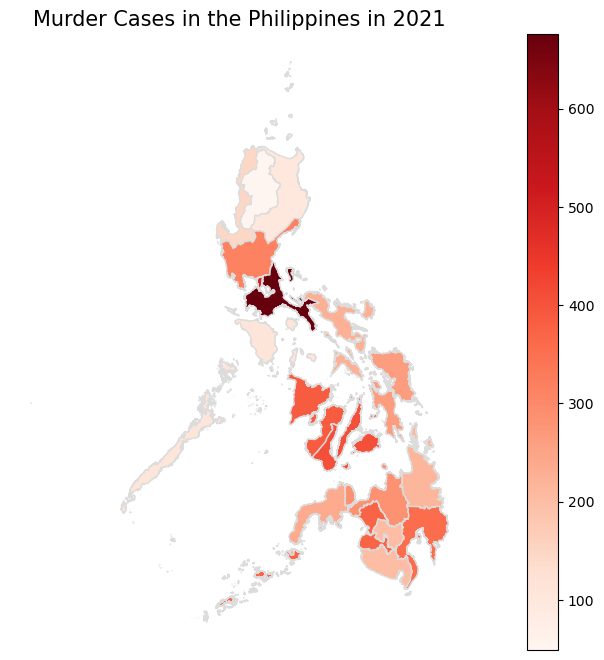

In [67]:
ax = murder2021.plot(figsize = (15, 8), 
                     column = '16.1.s1 Number of murder cases', 
                     cmap = plt.cm.Reds, 
                     legend = True, 
                     edgecolor = 'gainsboro')

ax.set_title('Murder Cases in the Philippines in 2021', fontsize = 15)
ax.axis(False)

From this map, we can easily determine that the highest number of murder cases in the Philippines is found in the National Capital Region.

### Which region has the highest amount of poverty proportion from the most recent data?

Next, we would be looking at the amount of poverty prortion per region. Like in the previous EDA, we have to determine the latest year that has the data for the **1.2.1 Poverty Proportion**.

In [72]:
combined_df[['Geolocation', 'Year', '1.2.1 Poverty Proportion', 'geometry']].dropna ()

,Geolocation,Year,1.2.1 Poverty Proportion,geometry
255,NCR: National Capital Region,2015,4.1,POLYGON ((121.03841659800003 14.78524708100002...
256,CAR: Cordillera Administrative Region,2015,22.7,POLYGON ((121.22208115400008 18.50058094200005...
257,Region 1: Ilocos Region,2015,18.8,MULTIPOLYGON (((119.8659631480001 15.815394096...
258,Region 2: Cagayan Valley,2015,17.8,MULTIPOLYGON (((122.46666630600009 16.92134842...
259,Region 3: Central Luzon,2015,10.5,MULTIPOLYGON (((120.11686801200005 14.76308966...
260,Region 4A: CALABARZON,2015,12.5,MULTIPOLYGON (((122.7216452990001 13.364847839...
261,MIMAROPA: Southwestern Tagalog Region,2015,25.2,MULTIPOLYGON (((117.31259603500007 7.506706648...
262,Region 5: Bicol Region,2015,39.8,MULTIPOLYGON (((122.9882253830001 11.730793677...
263,Region 6: Western Visayas,2015,24.6,MULTIPOLYGON (((122.4968432280001 9.5560704530...
264,Region 7: Central Visayas,2015,29.4,MULTIPOLYGON (((123.27038790600011 9.084596680...


From this, we are able to see that the latest data is from the year **2018**. 

Next, we would be getting the data (i.e., `Geolocation`, `1.2.1 Poverty Proportion`, and `geometry`) for the year 2018.

In [73]:
pov_prop_2018 = combined_df[combined_df['Year'] == 2018][['Geolocation','1.2.1 Poverty Proportion', 'geometry']]
pov_prop_2018 = pov_prop_2018.reset_index (drop = True)
pov_prop_2018

,Geolocation,1.2.1 Poverty Proportion,geometry
0,NCR: National Capital Region,2.2,POLYGON ((121.03841659800003 14.78524708100002...
1,CAR: Cordillera Administrative Region,12.0,POLYGON ((121.22208115400008 18.50058094200005...
2,Region 1: Ilocos Region,9.9,MULTIPOLYGON (((119.8659631480001 15.815394096...
3,Region 2: Cagayan Valley,16.3,MULTIPOLYGON (((122.46666630600009 16.92134842...
4,Region 3: Central Luzon,7.0,MULTIPOLYGON (((120.11686801200005 14.76308966...
5,Region 4A: CALABARZON,7.1,MULTIPOLYGON (((122.7216452990001 13.364847839...
6,MIMAROPA: Southwestern Tagalog Region,15.1,MULTIPOLYGON (((117.31259603500007 7.506706648...
7,Region 5: Bicol Region,27.0,MULTIPOLYGON (((122.9882253830001 11.730793677...
8,Region 6: Western Visayas,16.3,MULTIPOLYGON (((122.4968432280001 9.5560704530...
9,Region 7: Central Visayas,17.7,MULTIPOLYGON (((123.27038790600011 9.084596680...


Since we plan to create a map for this data, we would have to convert the Pandas DataFrame into a GeoDataFrame.

In [74]:
pov_prop_2018 = gpd.GeoDataFrame(pov_prop_2018, geometry = pov_prop_2018 ['geometry'])
pov_prop_2018

,Geolocation,1.2.1 Poverty Proportion,geometry
0,NCR: National Capital Region,2.2,"POLYGON ((121.03842 14.78525, 121.03876 14.785..."
1,CAR: Cordillera Administrative Region,12.0,"POLYGON ((121.22208 18.50058, 121.22086 18.483..."
2,Region 1: Ilocos Region,9.9,"MULTIPOLYGON (((119.86596 15.81539, 119.86597 ..."
3,Region 2: Cagayan Valley,16.3,"MULTIPOLYGON (((122.46667 16.92135, 122.46674 ..."
4,Region 3: Central Luzon,7.0,"MULTIPOLYGON (((120.11687 14.76309, 120.11689 ..."
5,Region 4A: CALABARZON,7.1,"MULTIPOLYGON (((122.72165 13.36485, 122.72181 ..."
6,MIMAROPA: Southwestern Tagalog Region,15.1,"MULTIPOLYGON (((117.31260 7.50671, 117.31249 7..."
7,Region 5: Bicol Region,27.0,"MULTIPOLYGON (((122.98823 11.73079, 122.98824 ..."
8,Region 6: Western Visayas,16.3,"MULTIPOLYGON (((122.49684 9.55607, 122.49685 9..."
9,Region 7: Central Visayas,17.7,"MULTIPOLYGON (((123.27039 9.08460, 123.27040 9..."


Using this GeoDataFrame, we can now create a map to show the poverty propertion in the regions of the Philippines.

(113.66153858585, 127.22131926315006, 3.760564947900073, 21.948615028100072)

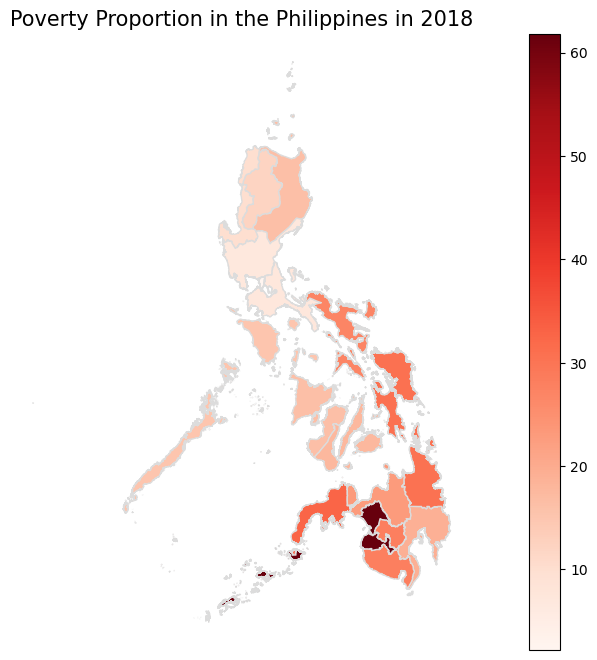

In [75]:
ax = pov_prop_2018.plot(figsize = (15, 8), 
                     column = '1.2.1 Poverty Proportion', 
                     cmap = plt.cm.Reds, 
                     legend = True, 
                     edgecolor = 'gainsboro')

ax.set_title('Poverty Proportion in the Philippines in 2018', fontsize = 15)
ax.axis(False)

From this, we can see that the highest poverty proportion is in the **BARMM**. However, to ensure this, let us look at the sorted tabular data of the poverty proportion.

In [86]:
pov_prop_2018 = pov_prop_2018.sort_values(by = ['1.2.1 Poverty Proportion']).reset_index (drop = True)
pov_prop_2018

,Geolocation,1.2.1 Poverty Proportion,geometry
0,NCR: National Capital Region,2.2,"POLYGON ((121.03842 14.78525, 121.03876 14.785..."
1,Region 3: Central Luzon,7.0,"MULTIPOLYGON (((120.11687 14.76309, 120.11689 ..."
2,Region 4A: CALABARZON,7.1,"MULTIPOLYGON (((122.72165 13.36485, 122.72181 ..."
3,Region 1: Ilocos Region,9.9,"MULTIPOLYGON (((119.86596 15.81539, 119.86597 ..."
4,CAR: Cordillera Administrative Region,12.0,"POLYGON ((121.22208 18.50058, 121.22086 18.483..."
5,MIMAROPA: Southwestern Tagalog Region,15.1,"MULTIPOLYGON (((117.31260 7.50671, 117.31249 7..."
6,Region 2: Cagayan Valley,16.3,"MULTIPOLYGON (((122.46667 16.92135, 122.46674 ..."
7,Region 6: Western Visayas,16.3,"MULTIPOLYGON (((122.49684 9.55607, 122.49685 9..."
8,Region 7: Central Visayas,17.7,"MULTIPOLYGON (((123.27039 9.08460, 123.27040 9..."
9,Region 11: Davao Region,19.1,"MULTIPOLYGON (((125.39719 5.43791, 125.39719 5..."


To easily visualize these numbers (which are abstracted in the map), let us create a horizontal bar graph. 

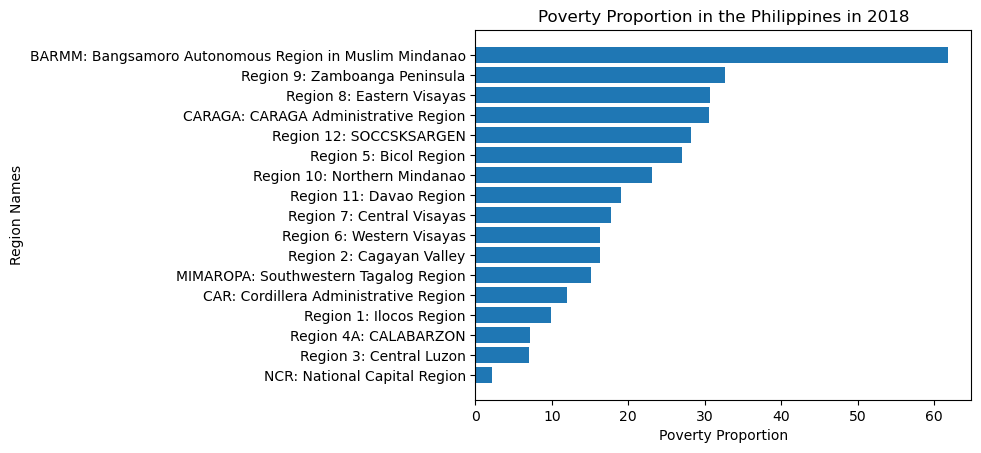

In [87]:
plt.barh(pov_prop_2018 ['Geolocation'], pov_prop_2018 ['1.2.1 Poverty Proportion'])

plt.xlabel("Poverty Proportion")
 
plt.ylabel("Region Names")  
plt.title("Poverty Proportion in the Philippines in 2018")
plt.show()

From the table and the two graphs, we can see that the **BARMM** has the highest poverty population, while the **National Capital Region** has the lowest.